In [7]:
import pandas as pd

# Wczytanie danych z pełną ścieżką
df = pd.read_csv(r"C:\Users\abero\Downloads\penguins (2).csv")

# Podgląd danych
print(df.head())

   CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0          39.1         18.7          181.0    3750.0        0
1          39.5         17.4          186.0    3800.0        0
2          40.3         18.0          195.0    3250.0        0
3           NaN          NaN            NaN       NaN        0
4          36.7         19.3          193.0    3450.0        0


Pierwsze 5 wierszy:
   CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0          39.1         18.7          181.0    3750.0        0
1          39.5         17.4          186.0    3800.0        0
2          40.3         18.0          195.0    3250.0        0
3           NaN          NaN            NaN       NaN        0
4          36.7         19.3          193.0    3450.0        0

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB
None

Statystyki opisowe:
       CulmenLength  CulmenDepth  FlipperLength     BodyMass     Species
count    342.00000

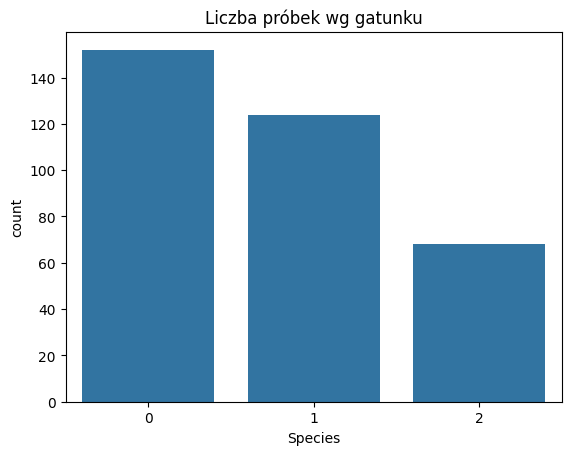

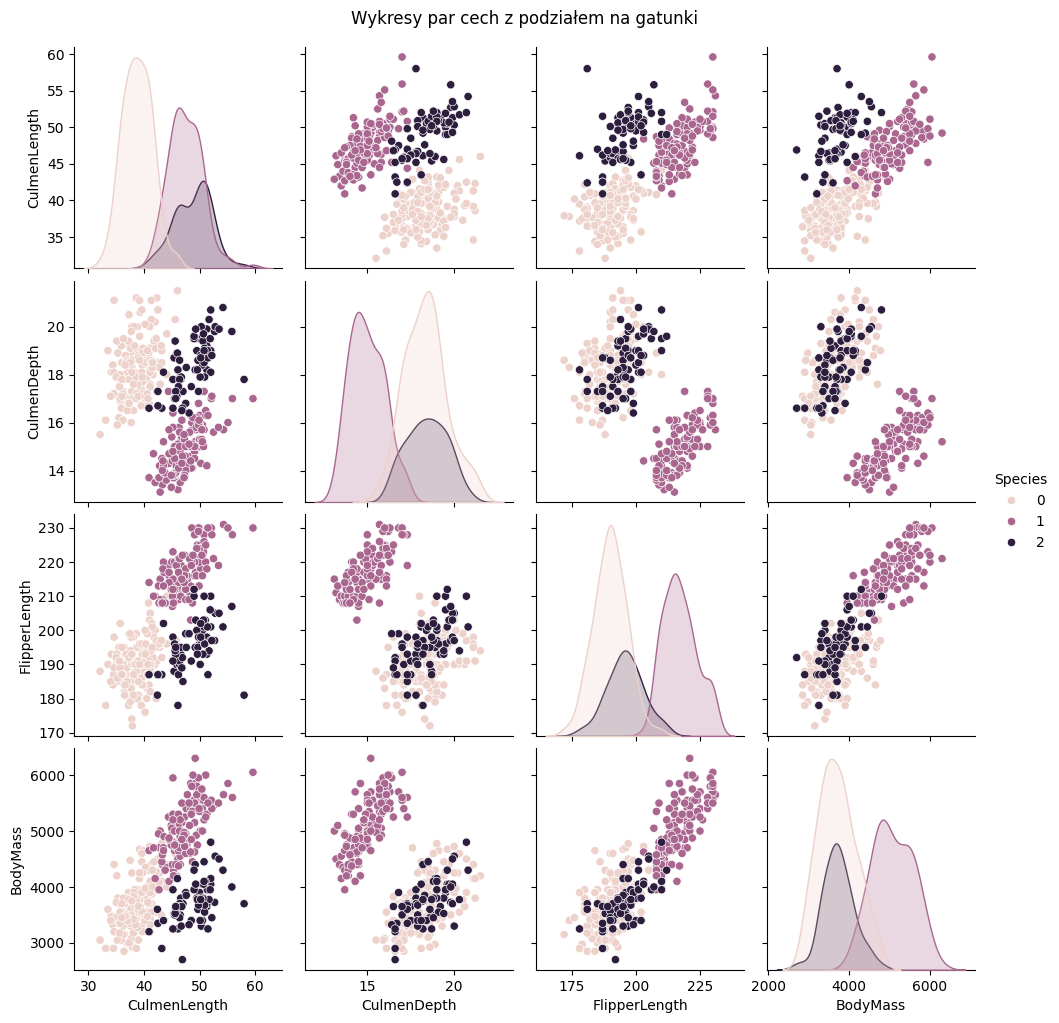


Model: Decision Tree
Dokładność (Accuracy): 0.9710
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      1.00      1.00        25
           2       1.00      0.86      0.92        14

    accuracy                           0.97        69
   macro avg       0.98      0.95      0.96        69
weighted avg       0.97      0.97      0.97        69


Model: Random Forest
Dokładność (Accuracy): 0.9855
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69


Model: AdaBoost
Dokładność (Accuracy): 0.9565
Raport klasyfikacji:
              precision 

In [8]:
# Importy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Wczytanie danych
df = pd.read_csv(r"C:\Users\abero\Downloads\penguins (2).csv")

# 2. Eksploracja danych
print("Pierwsze 5 wierszy:")
print(df.head())
print("\nInformacje o danych:")
print(df.info())
print("\nStatystyki opisowe:")
print(df.describe())
print("\nLiczba próbek na gatunek:")
print(df['Species'].value_counts())
print("\nBraki danych w kolumnach:")
print(df.isnull().sum())

# Wizualizaacje
sns.countplot(x='Species', data=df)
plt.title('Liczba próbek wg gatunku')
plt.show()

sns.pairplot(df.dropna(), hue='Species', diag_kind='kde')
plt.suptitle('Wykresy par cech z podziałem na gatunki', y=1.02)
plt.show()

# 3. Czyszczenie danych - usunięcie wierszy z  brakami
df_clean = df.dropna()

# 4. Przygotowanie X i y
X = df_clean.drop('Species', axis=1)
y = df_clean['Species']

# Standaryzacja cech 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 6. Definicja modeli
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# 7. Trenowanie i ocena modeli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Dokładność (Accuracy): {acc:.4f}")
    print("Raport klasyfikacji:")
    print(classification_report(y_test, y_pred))